In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Initial data preparation

**Load train and test datasets**

In [2]:
full_train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

**First glance ad the data**

In [3]:
full_train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
full_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
full_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Set column names to lowercase**

In [6]:
full_train_data.columns = full_train_data.columns.str.lower()
test_data.columns = test_data.columns.str.lower()
full_train_data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Age distribution by pclass**

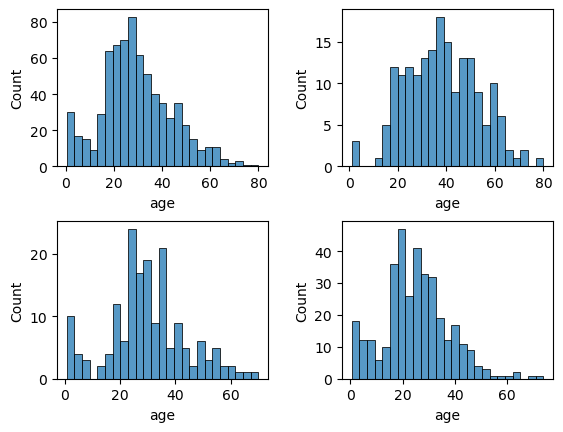

In [7]:
# TODO legends

fig = plt.figure()
fig.subplots_adjust(hspace=0.35, wspace=0.35)

ax = fig.add_subplot(2, 2, 1)
sns.histplot(full_train_data.age, ax=ax, bins=25)

ax = fig.add_subplot(2, 2, 2)
sns.histplot(full_train_data[full_train_data.pclass == 1].age, ax=ax, bins=25)

ax = fig.add_subplot(2, 2, 3)
sns.histplot(full_train_data[full_train_data.pclass == 2].age, ax=ax, bins=25)

ax = fig.add_subplot(2, 2, 4)
sns.histplot(full_train_data[full_train_data.pclass == 3].age, ax=ax, bins=25)

plt.show()

# Exploratory data analysis

**Check empty values in the data**

In [8]:
full_train_data.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [9]:
test_data.isna().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [10]:
full_train_data[full_train_data.age.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [11]:
test_data[test_data.age.isna()]

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Restore empty age values**

Get mean ages of Master, Miss, Mr., Mrs. types

In [12]:
def average_ages(df_train, df_test):
    df = pd.concat([df_train, df_test])
    master_age_mean = df[df.name.str.contains('Master')].age.mean()
    miss_age_mean = df[df.name.str.contains('Miss')].age.mean()
    mr_age_mean = df[df.name.str.contains('Mr.')].age.mean()
    mrs_age_mean = df[df.name.str.contains('Mrs.')].age.mean()

    return {'Master': master_age_mean, 'Miss': miss_age_mean, 'Mr.': mr_age_mean, 'Mrs.': mrs_age_mean}

In [13]:
avg_ages = average_ages(full_train_data, test_data)
avg_ages


{'Master': 5.482641509433963,
 'Miss': 21.774238095238097,
 'Mr.': 33.32208994708995,
 'Mrs.': 36.804597701149426}

Other types of names with NaN value

In [14]:
mask_gtpn = (full_train_data.name.str.contains('Master')) | (full_train_data.name.str.contains('Miss')) | (full_train_data.name.str.contains('Mr.')) | (full_train_data.name.str.contains('Mrs.'))
full_train_data[~mask_gtpn & full_train_data.age.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


In [15]:
mask_gtpn = (test_data.name.str.contains('Master')) | (test_data.name.str.contains('Miss')) | (test_data.name.str.contains('Mr.')) | (test_data.name.str.contains('Mrs.'))
test_data[~mask_gtpn & test_data.age.isna()]

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q


Fill NaN values

In [16]:
def fill_empty_ages(df, aa_dict):
    for key_name in aa_dict:
        key_mask = df.name.str.contains(str(key_name))
        df.loc[key_mask, 'age'] = df.loc[key_mask, 'age'].fillna(value=aa_dict[key_name])

In [17]:
fill_empty_ages(full_train_data, avg_ages)
fill_empty_ages(test_data, avg_ages)

In [18]:
# Dr Arthur Dominick Jackson Brewe was born in Woodford, a village in Co Galway, Ireland on 18 August 1866. 
# He was 45 years old.
full_train_data.loc[full_train_data.passengerid == 767, 'age'] = 45

In [19]:
# Bridget Donohoe was born in Cum, Addergoole, Co Mayo, Ireland on 15 January 1891.
# She was 21 years old.
test_data.loc[test_data.passengerid == 980, 'age'] = 21

**Analysis of embarked**

In [20]:
full_train_data[full_train_data.embarked.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [21]:
pd.crosstab(full_train_data.embarked, full_train_data.survived)

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,217


In [22]:
full_train_data.embarked.fillna('S', inplace=True)

Check empty values

In [23]:
full_train_data.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         0
dtype: int64

In [24]:
test_data.isna().sum()

passengerid      0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

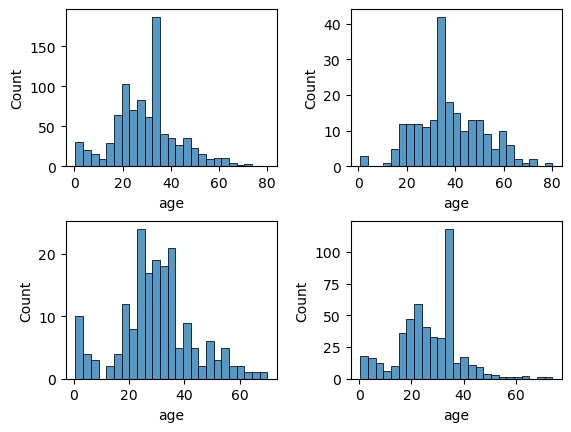

In [25]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.35, wspace=0.35)

ax = fig.add_subplot(2, 2, 1)
sns.histplot(full_train_data.age, ax=ax, bins=25)

ax = fig.add_subplot(2, 2, 2)
sns.histplot(full_train_data[full_train_data.pclass == 1].age, ax=ax, bins=25)

ax = fig.add_subplot(2, 2, 3)
sns.histplot(full_train_data[full_train_data.pclass == 2].age, ax=ax, bins=25)

ax = fig.add_subplot(2, 2, 4)
sns.histplot(full_train_data[full_train_data.pclass == 3].age, ax=ax, bins=25)

plt.show()

**Correlation Between The Features**

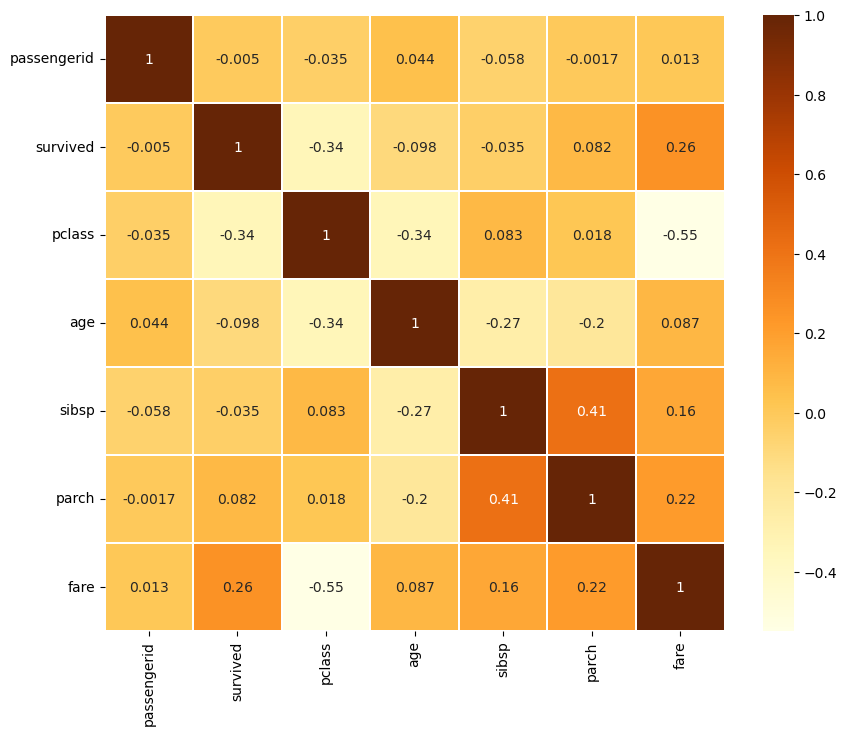

In [26]:
sns.heatmap(full_train_data.corr(numeric_only=True), annot=True, cmap='YlOrBr', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Feature engeneering

**Age to categorical feature**

In [27]:
# Train dataset
full_train_data['age_cat'] = 0

full_train_data.loc[full_train_data['age'] <= 16, 'age_cat'] = 0
full_train_data.loc[(full_train_data['age'] > 16) & (full_train_data['age']<=32),'age_cat'] = 1
full_train_data.loc[(full_train_data['age'] > 32) & (full_train_data['age']<=48),'age_cat'] = 2
full_train_data.loc[(full_train_data['age'] > 48) & (full_train_data['age']<=64),'age_cat'] = 3
full_train_data.loc[full_train_data['age'] > 64, 'age_cat'] = 4

# Test dataset
test_data['age_cat'] = 0

test_data.loc[test_data['age'] <= 16, 'age_cat'] = 0
test_data.loc[(test_data['age'] > 16) & (test_data['age']<=32),'age_cat'] = 1
test_data.loc[(test_data['age'] > 32) & (test_data['age']<=48),'age_cat'] = 2
test_data.loc[(test_data['age'] > 48) & (test_data['age']<=64),'age_cat'] = 3
test_data.loc[test_data['age'] > 64, 'age_cat'] = 4

**"Initial" to categorical feature**

In [28]:
# Train dataset
full_train_data['initial'] = 0

for i in full_train_data:
    full_train_data['initial'] = full_train_data.name.str.extract('([A-Za-z]+)\.')


# Test dataset
test_data['initial'] = 0

for i in test_data:
    test_data['initial'] = test_data.name.str.extract('([A-Za-z]+)\.')

In [29]:
full_train_data['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)
test_data['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'], inplace=True)

In [30]:
full_train_data.groupby('initial')['age'].mean()

initial
Master     4.665014
Miss      21.843401
Mr        32.893816
Mrs       35.625792
Other     45.888889
Name: age, dtype: float64

In [31]:
full_train_data['initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)
test_data['initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

**"Sex" to categorical feature**

In [32]:
full_train_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
test_data['sex'].replace(['male', 'female'], [0, 1], inplace=True)

**"Embarked" to categorical feature**

In [33]:
full_train_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
test_data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

**Create "family size" and "alone" features**

In [34]:
# Train dataset
full_train_data['family_size'] = 0

full_train_data['family_size'] = full_train_data['parch'] + full_train_data['sibsp']
full_train_data['alone'] = 0
full_train_data.loc[full_train_data.family_size == 0, 'alone'] = 1


# Test dataset
test_data['family_size'] = 0

test_data['family_size'] = test_data['parch'] + test_data['sibsp']
test_data['alone'] = 0
test_data.loc[test_data.family_size == 0, 'alone'] = 1

**Fare range**

In [35]:
full_train_data['fare_range'] = pd.qcut(full_train_data['fare'], 4)
full_train_data.groupby(['fare_range'])['survived'].mean().to_frame()

,survived
fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [36]:
# Train dataset
full_train_data['fare_cat'] = 0

full_train_data.loc[full_train_data['fare'] <= 7.91,'fare_cat'] = 0
full_train_data.loc[(full_train_data['fare'] > 7.91)&(full_train_data['fare'] <= 14.454), 'fare_cat'] = 1
full_train_data.loc[(full_train_data['fare'] > 14.454)&(full_train_data['fare'] <= 31), 'fare_cat'] = 2
full_train_data.loc[(full_train_data['fare'] > 31)&(full_train_data['fare'] <= 513), 'fare_cat'] = 3


# Test dataset
test_data['fare_cat'] = 0

test_data.loc[test_data['fare'] <= 7.91,'fare_cat'] = 0
test_data.loc[(test_data['fare'] > 7.91)&(test_data['fare'] <= 14.454), 'fare_cat'] = 1
test_data.loc[(test_data['fare'] > 14.454)&(test_data['fare'] <= 31), 'fare_cat'] = 2
test_data.loc[(test_data['fare'] > 31)&(test_data['fare'] <= 513), 'fare_cat'] = 3

**Drop useless features**

In [37]:
full_train_data.drop(['name', 'age', 'ticket', 'fare', 'cabin', 'fare_range', 'passengerid'], axis=1, inplace=True)
test_data.drop(['name', 'age', 'ticket', 'fare', 'cabin', 'passengerid'], axis=1, inplace=True)

In [38]:
full_train_data.head()

,survived,pclass,sex,sibsp,parch,embarked,age_cat,initial,family_size,alone,fare_cat
0,0,3,0,1,0,0,1,0,1,0,0
1,1,1,1,1,0,1,2,1,1,0,3
2,1,3,1,0,0,0,1,2,0,1,1
3,1,1,1,1,0,0,2,1,1,0,3
4,0,3,0,0,0,0,2,0,0,1,1


In [39]:
full_train_data.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
embarked       0
age_cat        0
initial        0
family_size    0
alone          0
fare_cat       0
dtype: int64

In [40]:
test_data.head()

,pclass,sex,sibsp,parch,embarked,age_cat,initial,family_size,alone,fare_cat
0,3,0,0,0,2,2,0,0,1,0
1,3,1,1,0,0,2,1,1,0,0
2,2,0,0,0,2,3,0,0,1,1
3,3,0,0,0,0,1,0,0,1,1
4,3,1,1,1,0,1,1,2,0,1


In [41]:
test_data.isna().sum()

pclass         0
sex            0
sibsp          0
parch          0
embarked       0
age_cat        0
initial        0
family_size    0
alone          0
fare_cat       0
dtype: int64

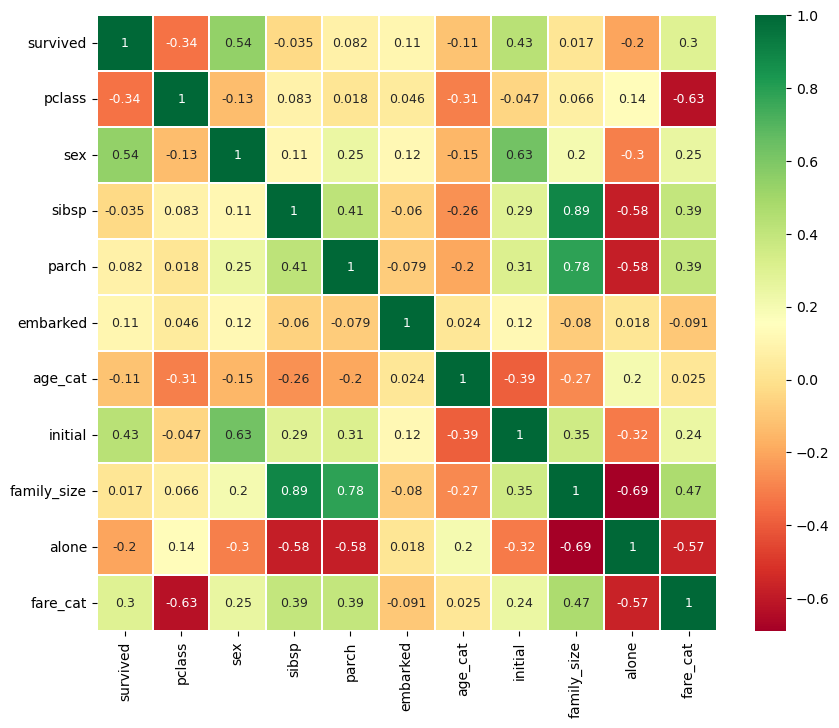

In [42]:
sns.heatmap(full_train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':9})
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Predictive modeling

### Split data for training and validation

In [43]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(full_train_data, test_size=0.25)

X_train = train_data[train_data.columns[1:]]
y_train = train_data.survived.values

X_val = val_data[val_data.columns[1:]]
y_val = val_data.survived.values

### Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(solver='liblinear')
LR_model.fit(X_train, y_train)

y_prediction = LR_model.predict_proba(X_val)[:, 1]

**Simple accuracy**

In [45]:
from sklearn.metrics import accuracy_score

tresholds = np.linspace(0, 1, 20)
accuracies = []

for t in tresholds:
    rescued = y_prediction >= t
    acc = accuracy_score(y_val, rescued)
    accuracies.append(acc)
    print(f'{t:.3f} ---> {acc:.3f}')

0.000 ---> 0.381
0.053 ---> 0.413
0.105 ---> 0.628
0.158 ---> 0.717
0.211 ---> 0.740
0.263 ---> 0.767
0.316 ---> 0.794
0.368 ---> 0.803
0.421 ---> 0.798
0.474 ---> 0.825
0.526 ---> 0.825
0.579 ---> 0.812
0.632 ---> 0.821
0.684 ---> 0.780
0.737 ---> 0.767
0.789 ---> 0.753
0.842 ---> 0.722
0.895 ---> 0.686
0.947 ---> 0.655
1.000 ---> 0.619


**t = 0.579** --- **accuracy = 0.830**

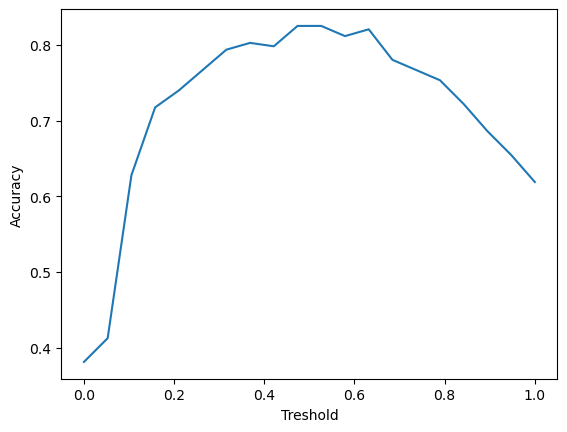

In [46]:
plt.plot(tresholds, accuracies)
plt.xlabel('Treshold')
plt.ylabel('Accuracy')
plt.show()

**ROC Curve**

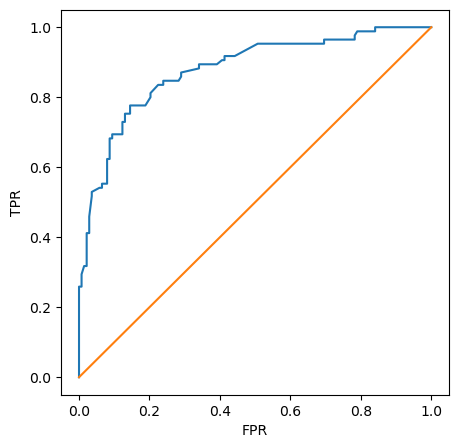

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tresholds = roc_curve(y_val, y_prediction)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**AUC**

In [48]:
roc_auc_score(y_val, y_prediction)

0.8775788576300085

# kaggle

In [49]:
X_full_train = full_train_data[full_train_data.columns[1:]]
y_full_train = full_train_data.survived.values

X_test = test_data

LR_model_k = LogisticRegression(solver='liblinear')
LR_model_k.fit(X_full_train, y_full_train)

predictions = LR_model_k.predict_proba(X_test)[:, 1]

In [50]:
predictions = (predictions >= 0.579).astype(int)

In [51]:
test_data_k = pd.read_csv('data/test.csv')
output = pd.DataFrame({'PassengerId': test_data_k.PassengerId, 'Survived': predictions})
output.to_csv('submission_lr.csv', index=False)